## Import libraries

In [1]:
!python -V

Python 3.6.3 :: Anaconda custom (64-bit)


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


Numpy version: 1.14.1
Pandas version: 0.22.0


In [3]:
import sklearn as sk
sk.__version__

'0.19.1'

In [4]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

## Import dataset

In [5]:
data_train = pd.read_csv('../data/cardiac_data_train_clean_35609_rows.csv', skipinitialspace=True)
data_test = pd.read_csv('../data/cardiac_data_test_clean_3957_rows.csv', skipinitialspace=True)

In [6]:
pd.set_option('display.max_columns', data_train.shape[1])
pd.set_option('max_colwidth', 1000)

In [7]:
data_train.head()

,sex,age,chr_resp,chr_cvs,chr_liv,chr_ren,immundis,immunrx,hepfail,lymphoma,metast,leukaem,immunsup,cirrhos,iddm,elect,pre_icu_hrs,intubated,ventilated,arf,gcsverb,gcsmotor,gcseye,urineop,temphi,templo,hrhi,hrlo,rrhi,rrlo,systolichi,systoliclo,diastolichi,diastoliclo,maphi,maplo,nahi,nalo,khi,klo,hco3hi,hco3lo,creathi,creatlo,hcthi,hctlo,hmgnhi,hmgnlo,wcchi,wcclo,plathi,platlo,gluchi,gluclo,apache3riskofdeath,anzrodriskofdeath,apache3score,died_hosp,age_group
0,F,56.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.083333,1.0,1.0,0.0,1.0,1.0,1.0,2450.00000,35.000000,34.400002,109.0,80.0,17.0,10.0,145.0,95.0,66.0,38.0,92.0,57.0,144.0,143.0,4.6,4.2,27.0,25.0,63.0,42.0,0.355,0.335,12.0,10.4,16.0,12.1,233.0,191.0,12.2,7.4,0.267206,0.026230,98.0,0.0,"[50, 60)"
1,M,52.610001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,1.866666,1.0,0.0,0.0,5.0,6.0,4.0,1847.14435,37.000000,36.000000,89.0,72.0,26.0,10.0,126.0,96.0,85.0,68.0,99.0,77.0,136.0,135.0,4.2,4.1,24.0,19.0,82.0,71.0,0.415,0.415,14.1,14.1,15.4,15.4,200.0,200.0,9.4,9.4,0.014114,0.046068,19.0,0.0,"[50, 60)"
2,M,27.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.116666,1.0,1.0,0.0,1.0,1.0,1.0,2084.00000,37.500000,35.500000,118.0,90.0,15.0,12.0,198.0,150.0,110.0,95.0,130.0,102.0,146.0,141.0,4.3,3.1,25.0,17.0,81.0,61.0,0.528,0.480,17.6,16.0,18.0,14.2,250.0,217.0,9.2,6.3,0.398730,0.211705,84.0,1.0,"[0, 30)"
3,F,69.599998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,45.566666,1.0,1.0,0.0,1.0,1.0,1.0,20.00000,36.000000,36.000000,40.0,30.0,6.0,2.0,122.0,122.0,60.0,60.0,81.0,81.0,141.0,140.0,3.7,3.6,13.0,10.0,77.0,57.0,0.350,0.350,11.2,11.2,5.3,5.3,112.0,112.0,8.5,6.5,0.856917,0.623343,129.0,1.0,"[60, 70)"
4,F,83.800003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,1.566666,1.0,1.0,0.0,1.0,1.0,1.0,1089.00000,36.799999,34.400002,90.0,60.0,24.0,12.0,170.0,110.0,70.0,40.0,103.0,63.0,137.0,136.0,4.3,4.3,27.0,24.0,100.0,77.0,0.350,0.300,11.8,10.5,14.3,10.3,302.0,249.0,8.3,6.4,0.777765,0.481486,114.0,0.0,"[80,)"


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35609 entries, 0 to 35608
Data columns (total 59 columns):
sex                   35609 non-null object
age                   35609 non-null float64
chr_resp              35609 non-null float64
chr_cvs               35609 non-null float64
chr_liv               35609 non-null float64
chr_ren               35609 non-null float64
immundis              35609 non-null float64
immunrx               35609 non-null float64
hepfail               35609 non-null float64
lymphoma              35609 non-null int64
metast                35609 non-null int64
leukaem               35609 non-null int64
immunsup              35609 non-null int64
cirrhos               35609 non-null int64
iddm                  35609 non-null float64
elect                 35609 non-null float64
pre_icu_hrs           35609 non-null float64
intubated             35609 non-null float64
ventilated            35609 non-null float64
arf                   35609 non-null float64
gc

## Data preprocessing piprlines
Prepare the data to a format that can be fit into scikit learn algorithms

**Categorical variable encoder**

In [9]:
categorical_vars = ['sex', 'chr_resp', 'chr_cvs', 'chr_liv', 'chr_ren',
       'immundis', 'immunrx', 'hepfail', 'lymphoma', 'metast',
       'leukaem', 'immunsup', 'cirrhos', 'iddm', 'arf', 'gcsverb',
       'gcsmotor', 'gcseye', 'intubated', 'ventilated', 'elect']

In [10]:
data_train[categorical_vars].head()

,sex,chr_resp,chr_cvs,chr_liv,chr_ren,immundis,immunrx,hepfail,lymphoma,metast,leukaem,immunsup,cirrhos,iddm,arf,gcsverb,gcsmotor,gcseye,intubated,ventilated,elect
0,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,5.0,6.0,4.0,1.0,0.0,0.0
2,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
4,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


GCS(Glasgow Coma Scale), according to [this article](https://emedicine.medscape.com/article/2172603-overview), has an order. 
> The GCS is often used to help define the severity of TBI. Mild head injuries are generally defined as those associated with a GCS score of 13-15, and moderate head injuries are those associated with a GCS score of 9-12. A GCS score of 8 or less defines a severe head injury.

So the coding in the dataset is good. While we could one-hot encode these variables, we will have isues with data sparsity. Therefore only sex needs to be tweaked a little

In [11]:
# to make a custom transformer to fit into a pipeline
class Vars_selector(BaseEstimator, TransformerMixin):
    '''Returns a subset of variables in a dataframe'''
    def __init__(self, var_names):
        '''var_names is a list of categorical variables names'''
        self.var_names = var_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        '''returns a dataframe with selected variables'''
        return X[self.var_names]

In [12]:
class Cat_vars_encoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        '''X is a dataframe'''
        X['sex'] = X.sex.map({'M':1, 'F':0}) # M -> 1, F -> 0
        return X.values

**Transform data in a pipeline** 

In [13]:
# categorical variables preprocessing
cat_vars_pipeline = Pipeline([
    ('selector', Vars_selector(categorical_vars)),
    ('encoder', Cat_vars_encoder())
])

 
For many machine learning algorithms, gradient descent is the preferred or even the only optimization method to learn the model parameters. Gradient descent is highly sensitive to feature scaling.

** Continuous vars **

In [14]:
continuous_vars = ['age', 'urineop', 'temphi', 'templo', 'hrhi', 'hrlo',
       'rrhi', 'rrlo', 'systolichi', 'systoliclo', 'diastolichi',
       'diastoliclo', 'maphi', 'maplo', 'nahi', 'nalo', 'khi', 'klo',
       'hco3hi', 'hco3lo', 'creathi', 'creatlo', 'hcthi', 'hctlo',
       'hmgnhi', 'hmgnlo', 'wcchi', 'wcclo', 'plathi', 'platlo', 'gluchi',
       'gluclo', 'pre_icu_hrs']

In [15]:
data_train[continuous_vars].describe()

,age,urineop,temphi,templo,hrhi,hrlo,rrhi,rrlo,systolichi,systoliclo,diastolichi,diastoliclo,maphi,maplo,nahi,nalo,khi,klo,hco3hi,hco3lo,creathi,creatlo,hcthi,hctlo,hmgnhi,hmgnlo,wcchi,wcclo,plathi,platlo,gluchi,gluclo,pre_icu_hrs
count,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000,35609.000000
mean,61.481085,1708.513097,36.911528,34.807573,104.860720,66.883833,22.357431,12.952715,144.128266,90.636954,73.675109,50.310496,97.745874,63.698506,140.076968,136.851907,4.746092,3.875669,22.192551,18.964126,156.605686,125.022444,0.380498,0.347563,12.714506,11.535971,17.508367,13.190731,234.872686,197.325674,12.537316,6.824730,83.340947
std,17.471596,1279.493455,1.278376,1.555627,24.969497,19.063989,7.570809,3.852769,28.219972,19.205122,16.593821,11.515400,19.047698,13.010076,4.700309,4.397228,0.849088,0.659570,4.824199,4.967040,143.007726,102.478431,0.069334,0.068911,2.194522,2.137640,11.232697,7.762152,88.911793,75.813738,5.793776,3.117268,1907.546161
min,0.100000,0.000000,25.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,1.600000,1.000000,2.000000,2.000000,10.000000,10.000000,0.050000,0.050000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.900002,879.000000,36.400002,34.000000,90.000000,55.000000,18.000000,11.000000,128.000000,80.000000,63.000000,45.000000,87.000000,58.000000,138.000000,135.000000,4.200000,3.500000,20.000000,16.000000,84.000000,71.000000,0.340000,0.310000,11.600000,10.640470,11.900000,9.300000,189.000000,164.000000,8.700000,5.300000,1.166666
50%,64.199997,1500.000000,37.000000,35.000000,102.000000,65.000000,21.983446,12.000000,143.281206,90.000000,72.000000,50.000000,97.000000,64.000000,140.000000,137.000000,4.600000,3.835245,22.162404,19.137301,120.000000,102.000000,0.381232,0.350000,12.737208,11.574003,16.336377,12.700000,232.961864,196.373574,11.600000,6.482022,3.116666
75%,75.000000,2275.000000,37.599998,36.000000,120.000000,78.000000,25.000000,14.000000,160.000000,100.000000,81.000000,56.000000,108.000000,70.000000,142.000000,139.000000,5.100000,4.200000,25.000000,22.000000,167.000000,135.717309,0.428000,0.390000,13.900000,12.600000,20.600000,15.200000,260.000000,215.000000,14.600000,7.300000,11.583333
max,110.000000,27090.000000,45.000000,41.599998,300.000000,240.000000,80.000000,80.000000,300.000000,294.000000,200.000000,143.000000,219.000000,168.000000,200.000000,168.000000,12.000000,10.900000,58.000000,60.000000,2500.000000,1790.000000,0.750000,0.750000,24.200001,22.400000,300.000000,300.000000,1500.000000,1500.000000,88.599998,62.000000,120528.000000


The scales among the continuous variables vary a lot, we need to standardize them prior to modelling.

In [16]:
# continuous variables preprocessing
cont_vars_pipeline = Pipeline([
    ('selector', Vars_selector(continuous_vars)),
    ('standardizer', StandardScaler())
])

To transform the two types of variables in one step

In [17]:
preproc_pipeline = FeatureUnion(transformer_list=[
    ('cat_pipeline', cat_vars_pipeline),
    ('cont_pipeline', cont_vars_pipeline)
])

In [18]:
data_train_X = pd.DataFrame(preproc_pipeline.fit_transform(data_train), 
                            columns=categorical_vars + continuous_vars)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [19]:
data_train_X.head()

,sex,chr_resp,chr_cvs,chr_liv,chr_ren,immundis,immunrx,hepfail,lymphoma,metast,leukaem,immunsup,cirrhos,iddm,arf,gcsverb,gcsmotor,gcseye,intubated,ventilated,elect,age,urineop,temphi,templo,hrhi,hrlo,rrhi,rrlo,systolichi,systoliclo,diastolichi,diastoliclo,maphi,maplo,nahi,nalo,khi,klo,hco3hi,hco3lo,creathi,creatlo,hcthi,hctlo,hmgnhi,hmgnlo,wcchi,wcclo,plathi,platlo,gluchi,gluclo,pre_icu_hrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.302271,0.579524,-1.495300,-0.262001,0.165776,0.688017,-0.707653,-0.766399,0.030891,0.227185,-0.462535,-1.069061,-0.301661,-0.514878,0.834645,1.398194,-0.172060,0.491737,0.996542,1.215202,-0.654559,-0.810157,-0.367754,-0.182307,-0.325591,-0.531421,-0.134285,-0.140521,-0.021063,-0.083438,-0.058221,0.184546,-0.043647
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,4.0,1.0,0.0,0.0,-0.507750,0.108350,0.069207,0.766536,-0.635213,0.268372,0.481140,-0.766399,-0.642400,0.279255,0.682486,1.536182,0.065842,1.022414,-0.867395,-0.421159,-0.643160,0.340121,0.374668,0.007222,-0.521697,-0.527167,0.497633,0.978619,0.631351,1.199484,-0.187702,0.284625,-0.392222,0.035275,-0.541505,0.826142,-0.042712
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-1.922066,0.293469,0.460334,0.445118,0.526221,1.212574,-0.971829,-0.247284,1.909020,3.091044,2.189092,3.880901,1.693358,2.944028,1.260155,0.943356,-0.525384,-1.176038,0.581959,-0.395437,-0.528690,-0.624749,2.127445,1.921872,2.226253,2.088328,0.043769,0.130026,0.170141,0.259512,-0.576026,-0.168332,-0.043630
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.464699,-1.319692,-0.713046,0.766536,-2.597635,-1.934766,-2.160623,-2.842857,-0.784146,1.633079,-0.824120,0.841451,-0.879167,1.329872,0.196380,0.715937,-1.232035,-0.417958,-1.905535,-1.804747,-0.556661,-0.663783,-0.439869,0.035366,-0.690140,-0.157171,-1.086875,-1.016579,-1.381981,-1.125480,-0.696847,-0.104173,-0.019803
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.277458,-0.484193,-0.087244,-0.262001,-0.595163,-0.361096,0.216964,-0.247284,0.916801,1.008237,-0.221478,-0.895378,0.275844,-0.053690,-0.654640,-0.193740,-0.525384,0.643354,0.996542,1.013872,-0.395828,-0.468617,-0.439869,-0.690213,-0.416728,-0.484640,-0.285631,-0.372419,0.754998,0.681605,-0.731367,-0.136253,-0.042869


## Fitting classifiers

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [21]:
data_train['died_hosp'].value_counts()

0.0    19392
1.0    16217
Name: died_hosp, dtype: int64

This is a fairly balanced dataset(i.e., the number of positive and negative cases are roughly the same), and we'll use AUC as our metric to optimise the model performance.

**_Assessing learning curve using the model default settings_**  
Tuning the model hyper-parameters are always difficult, so a good starting point is to see how the Scikit-learn default settings for the model performs, i.e., to see if it overfits or underfits, or is just right. This will give a good indication as to the direction of tuning. 

In [22]:
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc',
                                                           random_state=42, n_jobs=-1)
    plt.plot(train_sizes, np.mean(train_scores, axis=1), "o-", label="training scores")
    plt.plot(train_sizes, np.mean(val_scores, axis=1), "o-", label="x-val scores")
    plt.legend(fontsize=14).get_frame().set_facecolor('white')
    plt.xlabel("Training set size")
    plt.ylabel("Area under Curve")
    plt.title('{} learning curve'.format(model.__class__.__name__))

### Logistic Regression
Our first model is logistic regression

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


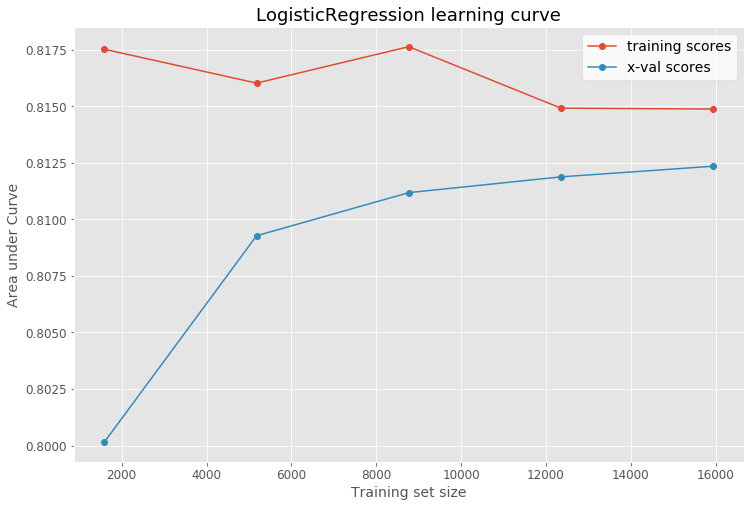

In [32]:
lr_clf = LogisticRegression(n_jobs = -1)
plot_learning_curves(lr_clf, data_train_X, data_train['died_hosp'])

Let's see if we can squeeze some more performance out by optimising C.

In [82]:
param_grid = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
    }
lr_clf = LogisticRegression(random_state=42)
grid_search = GridSearchCV(lr_clf, param_grid=param_grid, return_train_score=True,
                                cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(data_train_X, data_train['died_hosp'])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [83]:
cv_rlt = grid_search.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

,X-val scores,Train scores,Params
0,0.812354,0.814893,{'C': 1}
1,0.812311,0.814923,{'C': 10}
2,0.812300,0.814926,{'C': 100}
3,0.812300,0.814927,{'C': 1000}
4,0.812282,0.814606,{'C': 0.1}
5,0.810083,0.811990,{'C': 0.01}


Looks like C=0.1 is our best value.

In [84]:
lr_clf = grid_search.best_estimator_
with open('../models/lr_clf_final_round.pkl', 'wb') as f:
    pickle.dump(lr_clf, f)

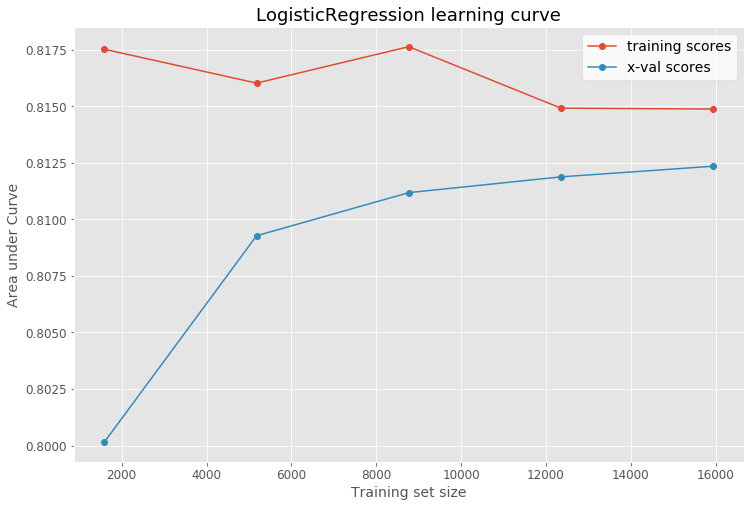

In [85]:
plot_learning_curves(lr_clf, data_train_X, data_train['died_hosp'])

Looks like the logistic regression model would benefit from additional data.

### Random Forests classifier
Random forests classifier is an ensemble tree-based model that reduces the variance of the predictors.

_plot the learning curve to find out where the default model is at_

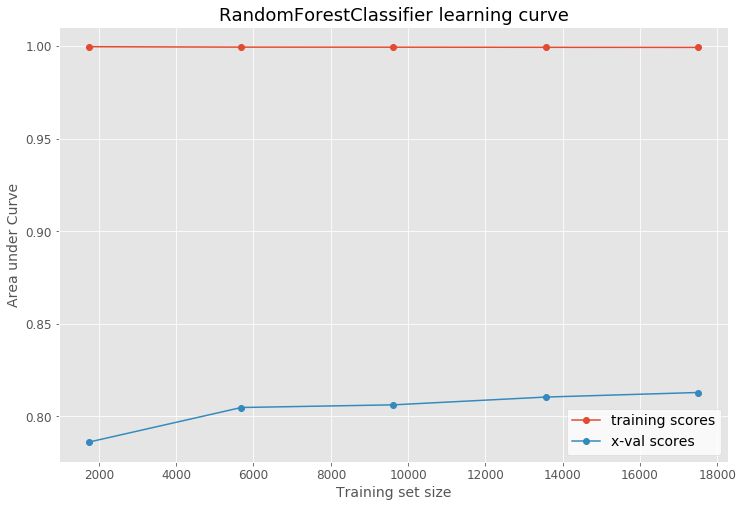

In [28]:
rf_clf = RandomForestClassifier(random_state=42)
plot_learning_curves(rf_clf, data_train_X, data_train['died_hosp'])

This is a typical overfitting curve. The default Random Forests classifier needs to be constrained. We'll use a randomised search to optimise hyperparameters

In [29]:
param_distribs = {
        'n_estimators': stats.randint(low=1, high=50),
         'max_features': ['auto', 'log2'],
        'max_depth': stats.randint(low=2, high=100),
        'min_samples_split': stats.randint(low=2, high=100), 
        'min_samples_leaf': stats.randint(low=2, high=100),
    }
rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs, return_train_score=True,
                                n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
rnd_search.fit(data_train_X, data_train['died_hosp'])

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c086cb898>, 'max_features': ['auto', 'log2'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c0860fba8>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c0860f748>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c0860f978>},
          pre_dispatch='2*n_jobs', random_

In [30]:
cv_rlt = rnd_search.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

,X-val scores,Train scores,Params
0,0.848249,0.934744,"{'max_depth': 36, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 42, 'n_estimators': 28}"
1,0.847730,0.997395,"{'max_depth': 61, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 48}"
2,0.847643,0.916432,"{'max_depth': 24, 'max_features': 'auto', 'min_samples_leaf': 16, 'min_samples_split': 44, 'n_estimators': 29}"
3,0.847544,0.909615,"{'max_depth': 62, 'max_features': 'log2', 'min_samples_leaf': 20, 'min_samples_split': 5, 'n_estimators': 35}"
4,0.846896,0.922433,"{'max_depth': 55, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 55, 'n_estimators': 29}"
5,0.846474,0.912373,"{'max_depth': 65, 'max_features': 'auto', 'min_samples_leaf': 18, 'min_samples_split': 45, 'n_estimators': 28}"
6,0.846405,0.892262,"{'max_depth': 75, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 96, 'n_estimators': 48}"
7,0.846322,0.912790,"{'max_depth': 91, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 21, 'n_estimators': 32}"
8,0.846073,0.956844,"{'max_depth': 95, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 17, 'n_estimators': 26}"
9,0.846035,0.896282,"{'max_depth': 52, 'max_features': 'auto', 'min_samples_leaf': 22, 'min_samples_split': 74, 'n_estimators': 39}"


As suspected, the best parameters have set constraints on the depth of the tree, mininum samples on the split nodes and leaf nodes.

In [222]:
#rf_clf = rnd_search.best_estimator_
rf_clf.fit(data_train_X, data_train['died_hosp'])
with open('../models/rf_clf_final_round.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

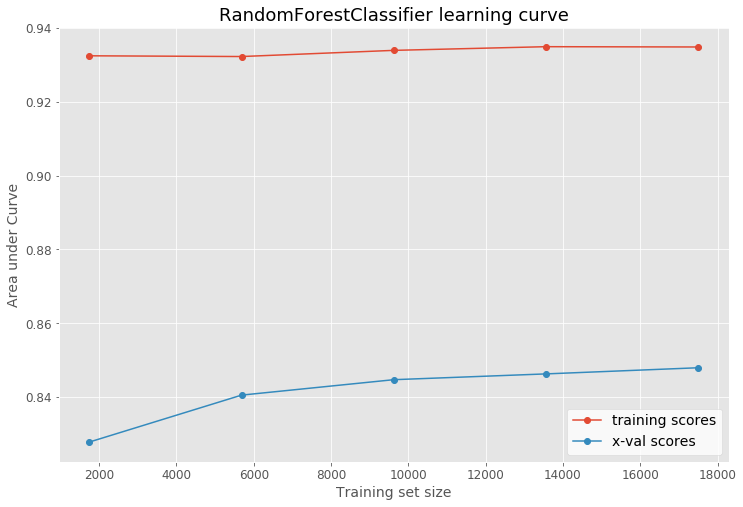

In [32]:
plot_learning_curves(rf_clf, data_train_X, data_train['died_hosp'])

The learning curve of the best Random Forests model suggests that the performance of the model might continue to increase with more traning data.

### Gradient boosting classifier
Gradient boosting classifier is an ensemble tree-based model that reduces the bias of the predictors.

_plot the learning curve to find out where the default model is at_

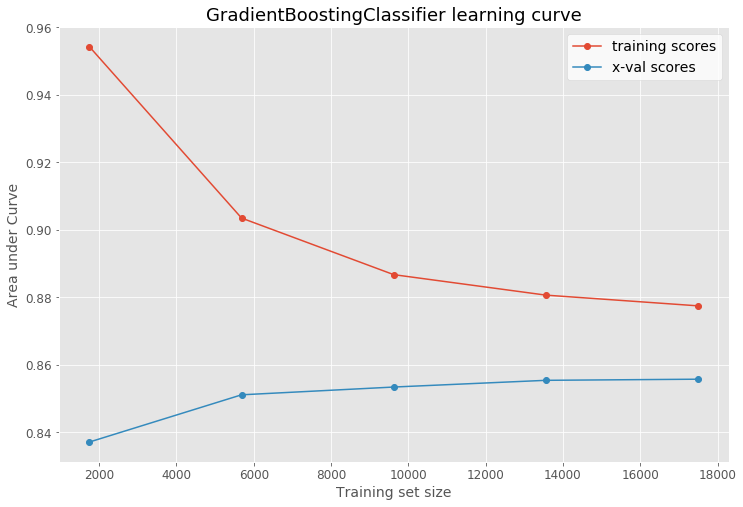

In [33]:
plot_learning_curves(GradientBoostingClassifier(random_state=42), data_train_X, data_train['died_hosp'])

The learning curve of the GBM might be a little underfitting. Maybe reducing regularization of the model could lead to better performance. We'll use a randomised search to optimise hyperparameters.

In [34]:
param_distribs = {
        'n_estimators': stats.randint(low=80, high=200),
        'max_depth': stats.randint(low=3, high=50),
        'min_samples_split': stats.randint(low=2, high=100), 
        'min_samples_leaf': stats.randint(low=2, high=100),
    }
rnd_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), 
                                param_distributions=param_distribs, return_train_score=True,
                                n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
# this will take a long time
rnd_search.fit(data_train_X, data_train['died_hosp'])

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c086bcb70>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c08660470>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c0868cfd0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c0868c630>},
          pre_

In [35]:
cv_rlt = rnd_search.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

,X-val scores,Train scores,Params
0,0.862680,0.937714,"{'max_depth': 5, 'min_samples_leaf': 47, 'min_samples_split': 25, 'n_estimators': 193}"
1,0.862432,0.978206,"{'max_depth': 13, 'min_samples_leaf': 89, 'min_samples_split': 25, 'n_estimators': 82}"
2,0.862039,0.967496,"{'max_depth': 11, 'min_samples_leaf': 91, 'min_samples_split': 54, 'n_estimators': 81}"
3,0.861845,0.928344,"{'max_depth': 5, 'min_samples_leaf': 21, 'min_samples_split': 25, 'n_estimators': 133}"
4,0.861642,0.944593,"{'max_depth': 8, 'min_samples_leaf': 81, 'min_samples_split': 94, 'n_estimators': 82}"
5,0.861606,0.990754,"{'max_depth': 25, 'min_samples_leaf': 97, 'min_samples_split': 98, 'n_estimators': 80}"
6,0.861421,0.903615,"{'max_depth': 4, 'min_samples_leaf': 43, 'min_samples_split': 46, 'n_estimators': 141}"
7,0.861175,0.902444,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 93, 'n_estimators': 133}"
8,0.861143,0.942176,"{'max_depth': 6, 'min_samples_leaf': 56, 'min_samples_split': 76, 'n_estimators': 135}"
9,0.860505,0.975929,"{'max_depth': 9, 'min_samples_leaf': 60, 'min_samples_split': 87, 'n_estimators': 107}"


We'll save the best model, retrain it on the whole dataset and save the model

In [220]:
gbm_clf = rnd_search.best_estimator_
gbm_clf.fit(data_train_X, data_train['died_hosp'])
with open('../models/gbm_clf_final_round.pkl', 'wb') as f:
    pickle.dump(gbm_clf, f)

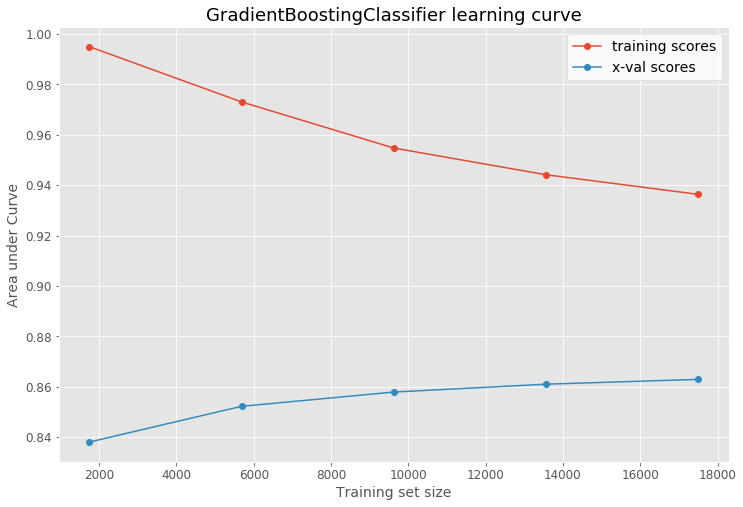

In [44]:
plot_learning_curves(gbm_clf, data_train_X, data_train['died_hosp'])

The learning curve of the best Gradient Boosting model suggests that the performance of the model might continue to increase with more traning data.

### Support vector machine classifier
Support vector machine classifier is a powerful classifier that works best on small to medium size complex data set. Our training set is medium size to SVMs.

_plot the learning curve to find out where the default model is at_

Try Linear SVC fist

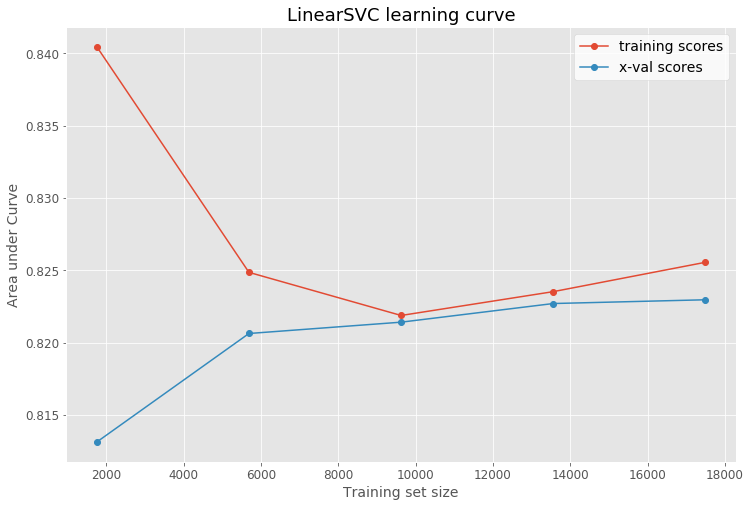

In [45]:
plot_learning_curves(LinearSVC(loss='hinge', random_state=42), data_train_X, data_train['died_hosp'])

Try Polynomial kernel

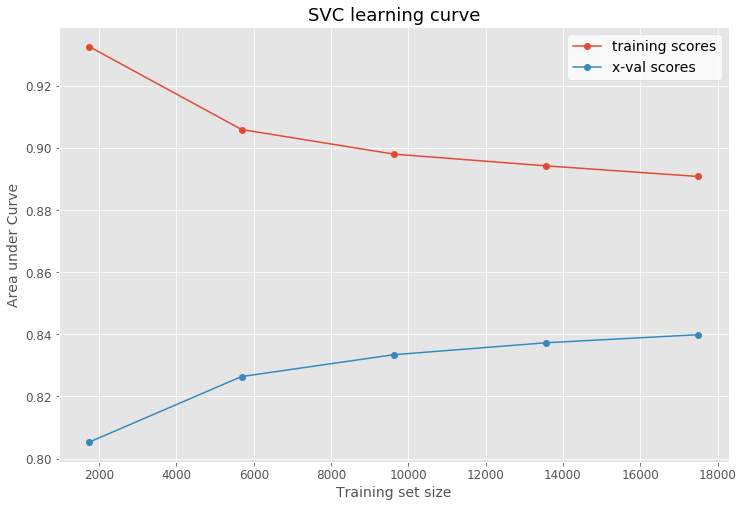

In [46]:
plot_learning_curves(SVC(kernel='poly', random_state=42), data_train_X, data_train['died_hosp'])

Try Gaussian RBF kernel

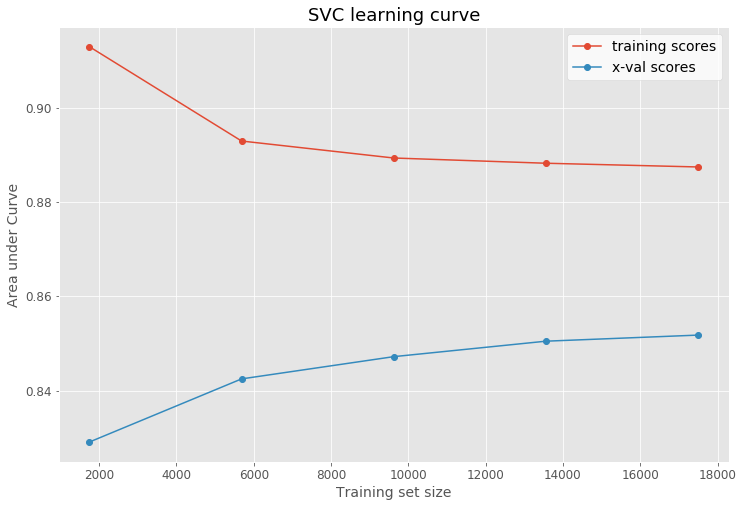

In [47]:
plot_learning_curves(SVC(random_state=42), data_train_X, data_train['died_hosp'])

The learning curve of the Linear SVC shows sign of underfitting, and provide evidence that the data set is not linearly seperatable.  

The Polynomial SVC shows that the default settings resulting in underfitted model, however, the performance is likely to improve if the complexity of the model increases, e.g., use higher degree polynomials.  

The default settings for RBF SVC performs the best, and with a gap between the training and validation accuracies, it is likely to improve the performance by regularization.

In [48]:
rbf_gamma = [1/len(data_train_X.columns) * x for x in range(1, 15, 5)]
param_grid = [
    # first try Poly kernel
    ## coef0 hyper-parameter was also tested originally, however, it is taking too long
    {'kernel':['poly'], 'degree': [3, 9, 15], 'C': [1, 3, 9]},
    # then try RBF kernel
    {'gamma': rbf_gamma, 'C': [1, 3, 9]},
  ]

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5,
                           scoring='roc_auc', n_jobs=-1)

# this will take a long time
grid_search.fit(data_train_X, data_train['died_hosp'])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['poly'], 'degree': [3, 9, 15], 'C': [1, 3, 9]}, {'gamma': [0.017857142857142856, 0.10714285714285714, 0.19642857142857142], 'C': [1, 3, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [49]:
cv_rlt = grid_search.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,X-val scores,Train scores,Params
0,0.851759,0.887386,"{'C': 1, 'gamma': 0.017857142857142856}"
1,0.849373,0.912752,"{'C': 3, 'gamma': 0.017857142857142856}"
2,0.841303,0.942409,"{'C': 9, 'gamma': 0.017857142857142856}"
3,0.839871,0.890867,"{'C': 1, 'degree': 3, 'kernel': 'poly'}"
4,0.834858,0.910965,"{'C': 3, 'degree': 3, 'kernel': 'poly'}"
5,0.827812,0.983272,"{'C': 1, 'gamma': 0.10714285714285714}"
6,0.822481,0.931807,"{'C': 9, 'degree': 3, 'kernel': 'poly'}"
7,0.813891,0.998202,"{'C': 3, 'gamma': 0.10714285714285714}"
8,0.806242,0.995993,"{'C': 1, 'gamma': 0.19642857142857142}"
9,0.804440,0.999266,"{'C': 9, 'gamma': 0.10714285714285714}"


SVM training is very computationaly expensive, making it not scalable to big data sets. As it turns out the default RBF SVM results the best cross-validation score.

In [223]:
svc_clf = grid_search.best_estimator_
svc_clf.fit(data_train_X, data_train['died_hosp'])
with open('../models/svc_clf_final_round.pkl', 'wb') as f:
    pickle.dump(svc_clf, f)

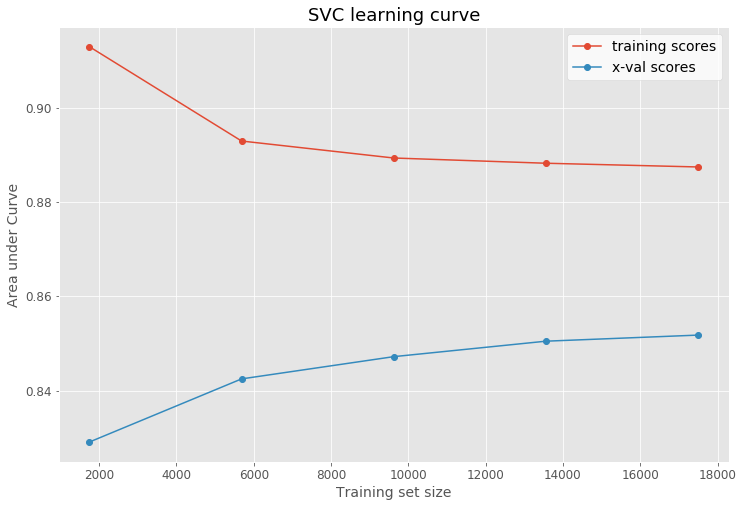

In [52]:
# best model is the default RBF kernal SVM
plot_learning_curves(svc_clf, data_train_X, data_train['died_hosp']) 

### Ensemble classifier
Scikit-learn offers a voting classifier which aggregates the prediction of multiple predictors and is a flexible ensemble technique that allows an ensemble of different models.  
For the final classifier, simply aggregate the predictions of the three best models, i.e., random forests, gradien boosting machine and the support vector machine.

In [224]:
ensemble_clf = VotingClassifier(estimators=[('rf', rf_clf), ('gbm', gbm_clf), ('svc', svc_clf)],
                             voting='soft')
ensemble_clf.fit(data_train_X, data_train['died_hosp'])

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=36, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=42,
            min_wei...'rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

Check out its learning curve.

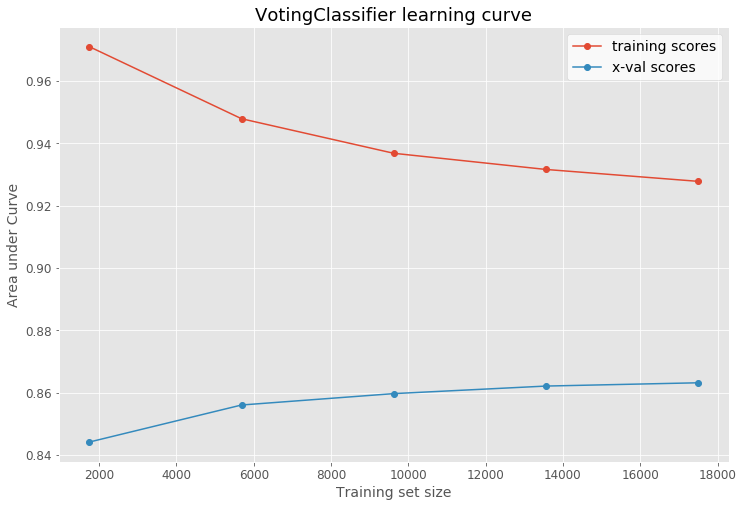

In [54]:
plot_learning_curves(ensemble_clf, data_train_X, data_train['died_hosp'])

This learning curve looks quite promising. It presents a good curve that is out of a right model. And the model might be benefit from more training data.

In [225]:
with open('../models/ensemble_clf_final_round.pkl', 'wb') as f:
    pickle.dump(ensemble_clf, f)

## h2o AutoML

In [180]:
import h2o
from h2o.automl import H2OAutoML

In [181]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 23 hours 48 mins
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,"7 days, 20 hours and 37 minutes"
H2O cluster name:,H2O_from_python_ubuntu_cwa5yz
H2O cluster total nodes:,1
H2O cluster free memory:,500.0 Mb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


In [182]:
# Create h2o dataframes. Make sure to run the "Compute and Compare test metrics" cells to create data_test_X 
# before running these cells

htrain = h2o.H2OFrame(pd.concat([data_train_X, data_train['died_hosp']], axis=1))
htest = h2o.H2OFrame(pd.concat([data_test_X, data_test['died_hosp']], axis=1))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [183]:
# define cols
x = htrain.columns
y = 'died_hosp'
x.remove(y)

In [184]:
htrain[y] = htrain[y].asfactor()
htest[y] = htest[y].asfactor()

In [106]:
# Train Deep Learners for 5 hous
aml_gbm_deep = H2OAutoML(max_runtime_secs = 18000, exclude_algos=['GLM','GBM','DRF','StackedEnsemble'])
aml_gbm_deep.train(x=x, y=y, training_frame=htrain, leaderboard_frame=htest)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [107]:
aml_gbm_deep.leaderboard

model_id,auc,logloss
DeepLearning_grid_0_AutoML_20180531_041722_model_20,0.84401,0.491039
DeepLearning_grid_0_AutoML_20180531_041722_model_5,0.843431,0.507891
DeepLearning_grid_0_AutoML_20180531_041722_model_49,0.843132,0.496605
DeepLearning_grid_0_AutoML_20180531_041722_model_57,0.84287,0.490299
DeepLearning_grid_0_AutoML_20180531_041722_model_33,0.842537,0.495374
DeepLearning_grid_0_AutoML_20180531_041722_model_24,0.841209,0.508254
DeepLearning_grid_0_AutoML_20180531_041722_model_10,0.841168,0.504416
DeepLearning_grid_0_AutoML_20180531_041722_model_7,0.839775,0.513298
DeepLearning_grid_0_AutoML_20180531_041722_model_45,0.839466,0.510607
DeepLearning_grid_0_AutoML_20180531_041722_model_0,0.839118,0.51654


In [108]:
# Save best deep learner predictions
h2o_deep_pred = aml_gbm_deep.leader.predict(htest)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [109]:
# Save the model
model_path = h2o.save_model(model=aml_gbm_deep.leader, path='../models/h2o_deep_learner_may31', force=True)

In [110]:
model_path

'/home/ubuntu/sandpit/IntelliHQ/ANZICS/Original Cardiac Arrest/models/h2o_deep_learner_may31/DeepLearning_grid_0_AutoML_20180531_041722_model_20'

## Compute and compare test metrics

**Transform test data set**

In [176]:
data_test_X = pd.DataFrame(preproc_pipeline.transform(data_test), # it's imperative not to do fit_transfomr again
                           columns=categorical_vars + numerical_vars)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [177]:
data_test_X.shape

(3957, 54)

In [178]:
data_test_X.head()

,sex,chr_resp,chr_cvs,chr_liv,chr_ren,immundis,immunrx,hepfail,lymphoma,metast,leukaem,immunsup,cirrhos,iddm,arf,gcsverb,gcsmotor,gcseye,intubated,ventilated,elect,age,urineop,temphi,templo,hrhi,hrlo,rrhi,rrlo,systolichi,systoliclo,diastolichi,diastoliclo,maphi,maplo,nahi,nalo,khi,klo,hco3hi,hco3lo,creathi,creatlo,hcthi,hctlo,hmgnhi,hmgnlo,wcchi,wcclo,plathi,platlo,gluchi,gluclo,pre_icu_hrs
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.502599,-0.232527,-0.165468,-1.097692,0.366023,-1.357753,-1.368094,-0.247284,1.554656,0.487535,2.671206,0.754609,2.008361,0.484362,0.621890,0.261098,-0.525384,-1.630886,0.436855,0.168286,-0.234995,-0.595475,0.186296,0.160515,2.317390,0.872016,-0.490394,-0.462601,0.811235,0.615653,-0.506985,-0.553290,-0.043691
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-2.425747,-1.297808,-1.338848,-0.454855,1.126962,1.002751,-0.839741,0.790945,-1.422001,-2.063903,-0.703592,-0.634854,-0.669165,-1.360388,2.111174,2.080452,0.887916,0.188506,-1.490953,-0.798097,-0.297930,-0.107560,-2.314874,-1.851139,0.492276,0.418358,-0.481491,-0.140521,0.183599,0.117101,-0.506985,-0.328731,-0.042179
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,4.0,1.0,1.0,0.0,0.905420,-0.973456,-0.321920,-0.197719,-0.995658,-1.357753,1.009493,0.790945,0.030891,-0.553868,-0.703592,-1.416427,-0.931668,-1.052930,-1.080150,-0.648578,2.065666,2.462745,-2.548138,-2.247673,0.827899,0.907302,2.156291,0.615830,1.952841,0.263860,1.031969,-0.282236,-1.224519,-1.534383,-1.059310,-1.066567,-0.031860
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.344502,-0.798384,-1.573523,-1.354824,0.205825,0.583106,-1.368094,-0.766399,0.208073,-0.293517,0.983807,-0.634854,0.643348,-0.514878,0.621890,-0.193740,0.063491,-0.872806,-1.366578,-1.804747,0.639096,0.907302,-0.007176,-0.254865,-0.097748,-0.578202,0.114990,-0.243587,0.181388,-0.175771,3.014084,1.596058,-0.042258
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.800229,-0.162968,-0.400143,-2.126229,-0.515064,-1.305298,-0.311389,0.012273,1.944456,0.331325,2.189092,0.320402,2.218364,0.330632,-0.441885,0.033679,-0.407610,-0.266342,0.167377,0.611212,-0.353872,-0.556441,0.281287,0.470714,0.312370,0.638110,-0.401367,-0.655849,-0.144782,-0.268104,-0.576026,-0.264572,-0.042913


**Compute test accuracy score**

In [179]:
def plot_roc_curve(fpr, tpr, auc, model=None):
    if model == None:
        title = None
    elif isinstance(model, str):
        title = model
    else:
        title = model.__class__.__name__
#    title = None if model == None else model.__class__.__name__
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, linewidth=2, label='auc: {}'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-.01, 1.01, -.01, 1.01])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend(fontsize=14).get_frame().set_facecolor('white')
    plt.title('{} - ROC Curve'.format(title))

### _Logistic Regression model_

In [185]:
# Import model and retrain
with open('../models/lr_clf_final_round.pkl', 'rb') as f:
    lr_clf = pickle.load(f)
lr_clf.fit(data_train_X, data_train['died_hosp'])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Accuracy scores

In [187]:
accu_lr = accuracy_score(data_test['died_hosp'], lr_clf.predict(data_test_X))

In [188]:
accu_lr

0.7533484963356077

In [189]:
pd.crosstab(data_test['died_hosp'], lr_clf.predict(data_test_X))

col_0,0.0,1.0
died_hosp,,
0.0,1692,463
1.0,513,1289


ROC and AUC

In [190]:
pred_proba_lr = lr_clf.predict_proba(data_test_X)

In [191]:
fpr, tpr, _ = roc_curve(data_test['died_hosp'], pred_proba_lr[:, 1])
auc_lr = roc_auc_score(data_test['died_hosp'], pred_proba_lr[:, 1])

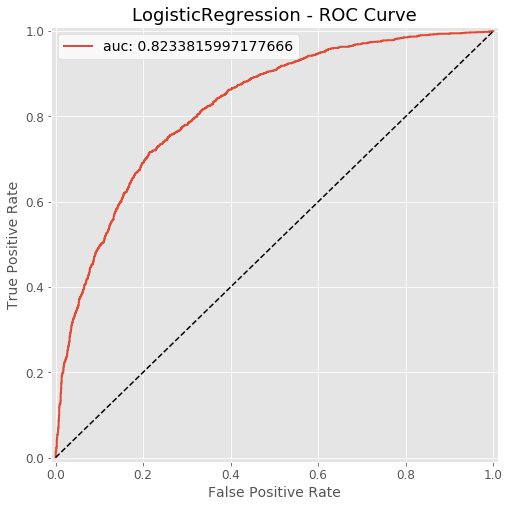

In [192]:
plot_roc_curve(fpr, tpr, auc_lr, lr_clf)

### _Random forests model_

In [193]:
# Import model and retrain
with open('../models/rf_clf_final_round.pkl', 'rb') as f:
    rf_clf = pickle.load(f)
rf_clf.fit(data_train_X, data_train['died_hosp'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=36, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=42,
            min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Accuracy scores

In [195]:
accu_rf = accuracy_score(data_test['died_hosp'], rf_clf.predict(data_test_X))

In [196]:
accu_rf

0.77710386656558

In [197]:
pd.crosstab(data_test['died_hosp'], rf_clf.predict(data_test_X))

col_0,0.0,1.0
died_hosp,,
0.0,1698,457
1.0,425,1377


ROC and AUC

In [198]:
pred_proba_rf = rf_clf.predict_proba(data_test_X)

In [199]:
fpr, tpr, _ = roc_curve(data_test['died_hosp'], pred_proba_rf[:, 1])
auc_rf = roc_auc_score(data_test['died_hosp'], pred_proba_rf[:, 1])

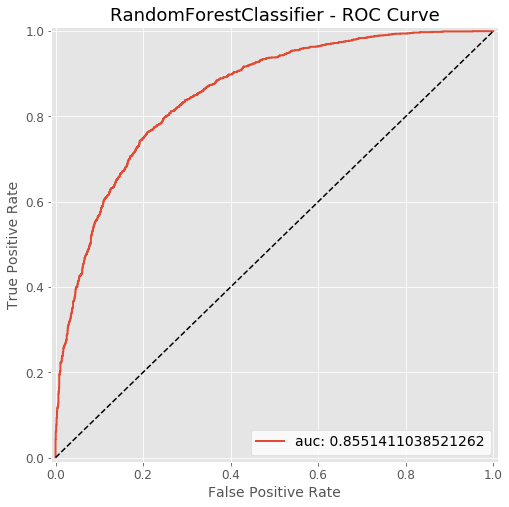

In [200]:
plot_roc_curve(fpr, tpr, auc_rf, rf_clf)

### _Gradient boosting machine model_

In [201]:
# Import model and retrain
with open('../models/gbm_clf_final_round.pkl', 'rb') as f:
    gbm_clf = pickle.load(f)
gbm_clf.fit(data_train_X, data_train['died_hosp'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=63, min_samples_split=63,
              min_weight_fraction_leaf=0.0, n_estimators=125,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

Accuracy scores

In [203]:
accu_gbm = accuracy_score(data_test['died_hosp'], gbm_clf.predict(data_test_X))

In [204]:
accu_gbm

0.7887288349759919

In [205]:
pd.crosstab(data_test['died_hosp'], gbm_clf.predict(data_test_X))

col_0,0.0,1.0
died_hosp,,
0.0,1769,386
1.0,450,1352


ROC and AUC

In [206]:
pred_proba_gbm = gbm_clf.predict_proba(data_test_X)

In [207]:
fpr, tpr, _ = roc_curve(data_test['died_hosp'], pred_proba_gbm[:, 1])
auc_gbm = roc_auc_score(data_test['died_hosp'], pred_proba_gbm[:, 1])

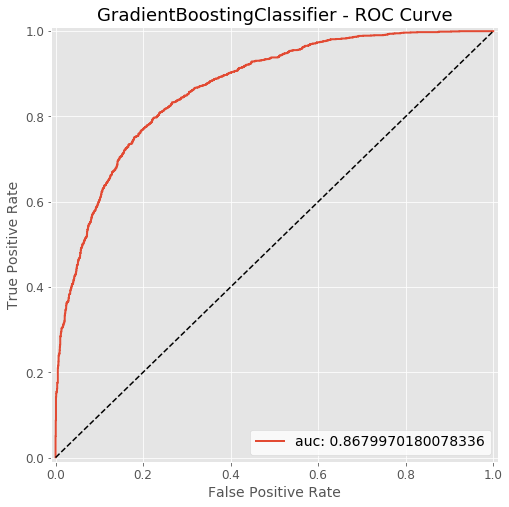

In [208]:
plot_roc_curve(fpr, tpr, auc_gbm, gbm_clf)

### _Support vector machine model_

In [209]:
# Import model and retrain
with open('../models/svc_clf_final_round.pkl', 'rb') as f:
    svc_clf = pickle.load(f)
svc_clf.fit(data_train_X, data_train['died_hosp'])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.017857142857142856,
  kernel='rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

Accuracy scores

In [211]:
accu_svc = accuracy_score(data_test['died_hosp'], svc_clf.predict(data_test_X))

In [212]:
accu_svc

0.778620166793025

In [213]:
pd.crosstab(data_test['died_hosp'], svc_clf.predict(data_test_X))

col_0,0.0,1.0
died_hosp,,
0.0,1729,426
1.0,450,1352


ROC and AUC

In [214]:
pred_proba_svc = svc_clf.predict_proba(data_test_X)

In [215]:
fpr, tpr, _ = roc_curve(data_test['died_hosp'], pred_proba_svc[:, 1])
auc_svc = roc_auc_score(data_test['died_hosp'], pred_proba_svc[:, 1])

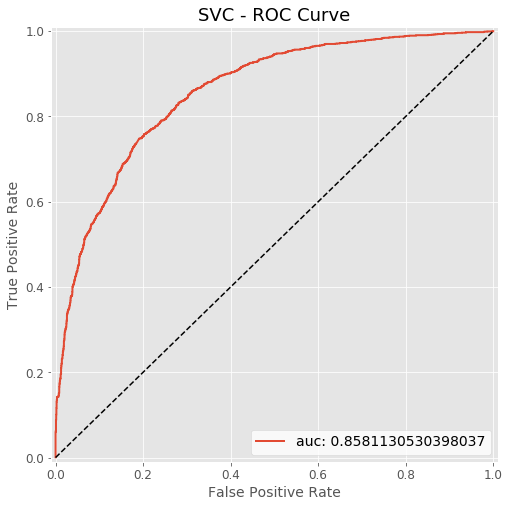

In [216]:
plot_roc_curve(fpr, tpr, auc_svc, svc_clf)

### _The ensemble model_

In [217]:
# Import model and retrain
with open('../models/ensemble_clf_final_round.pkl', 'rb') as f:
    ensemble_clf = pickle.load(f)
ensemble_clf.fit(data_train_X, data_train['died_hosp'])

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=36, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=42,
            min_wei...'rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

Accuracy scores

In [219]:
accu_ensemble = accuracy_score(data_test['died_hosp'], ensemble_clf.predict(data_test_X))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [220]:
accu_ensemble

0.7877179681576952

In [221]:
pd.crosstab(data_test['died_hosp'], ensemble_clf.predict(data_test_X))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


col_0,0.0,1.0
died_hosp,,
0.0,1753,402
1.0,438,1364


ROC and AUC

In [222]:
pred_proba_ensemble = ensemble_clf.predict_proba(data_test_X)

In [223]:
fpr, tpr, _ = roc_curve(data_test['died_hosp'], pred_proba_ensemble[:, 1])
auc_ensemble = roc_auc_score(data_test['died_hosp'], pred_proba_ensemble[:, 1])

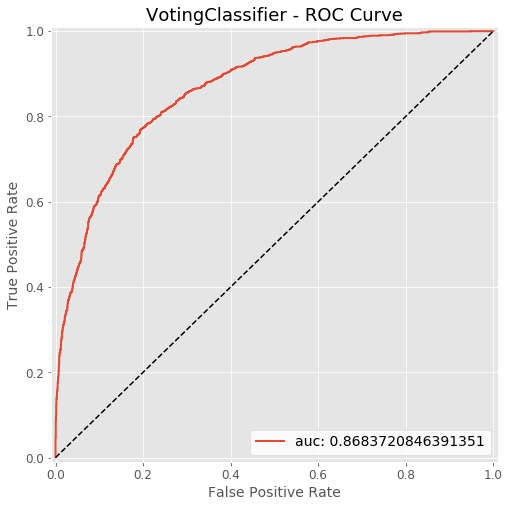

In [224]:
plot_roc_curve(fpr, tpr, auc_ensemble, ensemble_clf)

### _H2O Deep Learner_

In [68]:
model_path

NameError: name 'model_path' is not defined

In [225]:
# Use manual path if model_path is not defined
h2o_deep_learner = h2o.load_model('/home/ubuntu/sandpit/IntelliHQ/ANZICS/Original Cardiac Arrest/models/h2o_deep_learner_may31/DeepLearning_grid_0_AutoML_20180531_041722_model_20')
h2o_deep_learner.train(x=x, y=y, training_frame=htrain)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [226]:
# Get predictions
h2o_deep_pred = h2o_deep_learner.predict(htest)
# Convert to pandas df
h2o_deep_pred = h2o_deep_pred['p1'].as_data_frame()

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [227]:
accu_h2o_deep = accuracy_score(data_test['died_hosp'], round(h2o_deep_pred))
accu_h2o_deep

0.7710386656557998

In [228]:
pd.crosstab(data_test['died_hosp'], round(h2o_deep_pred))

col_0,"(p, 1)"
died_hosp,
0.0,2155
1.0,1802


In [229]:
fpr, tpr, _ = roc_curve(data_test['died_hosp'], h2o_deep_pred)
auc_h2o_deep = roc_auc_score(data_test['died_hosp'], h2o_deep_pred)

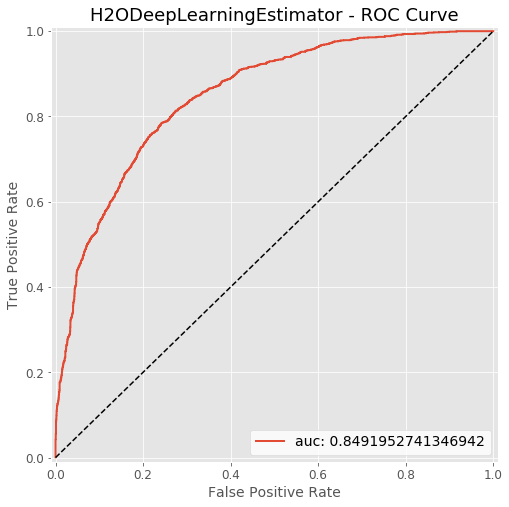

In [230]:
plot_roc_curve(fpr, tpr, auc_h2o_deep, h2o_deep_learner)

### _Apache 3_

In [231]:
accu_apache3 = accuracy_score(data_test[~data_test.apache3riskofdeath.isna()]['died_hosp'],
                              round(data_test[~data_test.apache3riskofdeath.isna()]['apache3riskofdeath']))
accu_apache3

0.7182519280205656

In [232]:
pd.crosstab(data_test[~data_test.apache3riskofdeath.isna()]['died_hosp'],
            round(data_test[~data_test.apache3riskofdeath.isna()]['apache3riskofdeath']))

apache3riskofdeath,0.0,1.0
died_hosp,,
0.0,1363,764
1.0,332,1431


In [233]:
fpr, tpr, _ = roc_curve(data_test[~data_test.apache3riskofdeath.isna()]['died_hosp'],
                        data_test[~data_test.apache3riskofdeath.isna()]['apache3riskofdeath'])
auc_apache3 = roc_auc_score(data_test[~data_test.apache3riskofdeath.isna()]['died_hosp'],
                            data_test[~data_test.apache3riskofdeath.isna()]['apache3riskofdeath'])

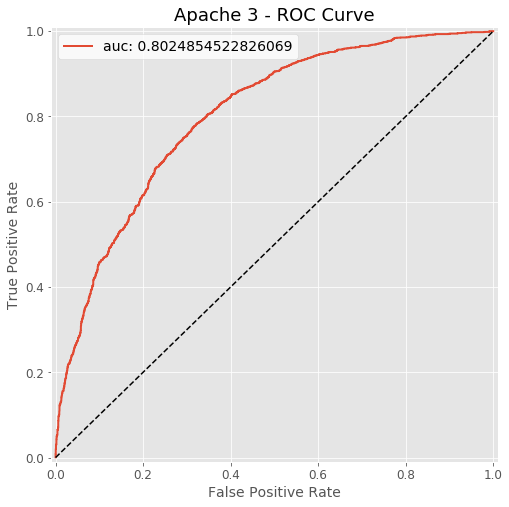

In [234]:
plot_roc_curve(fpr, tpr, auc_apache3, 'Apache 3')

### _ANZROD_

In [235]:
accu_anzrod = accuracy_score(data_test[~data_test.anzrodriskofdeath.isna()]['died_hosp'],
                             round(data_test[~data_test.anzrodriskofdeath.isna()]['anzrodriskofdeath']))
accu_anzrod

0.7262483994878361

In [236]:
pd.crosstab(data_test[~data_test.anzrodriskofdeath.isna()]['died_hosp'],
            round(data_test[~data_test.anzrodriskofdeath.isna()]['anzrodriskofdeath']))

anzrodriskofdeath,0.0,1.0
died_hosp,,
0.0,1746,393
1.0,676,1090


In [237]:
fpr, tpr, _ = roc_curve(data_test[~data_test.anzrodriskofdeath.isna()]['died_hosp'],
                        data_test[~data_test.anzrodriskofdeath.isna()]['anzrodriskofdeath'])
auc_anzrod = roc_auc_score(data_test[~data_test.anzrodriskofdeath.isna()]['died_hosp'],
                           data_test[~data_test.anzrodriskofdeath.isna()]['anzrodriskofdeath'])

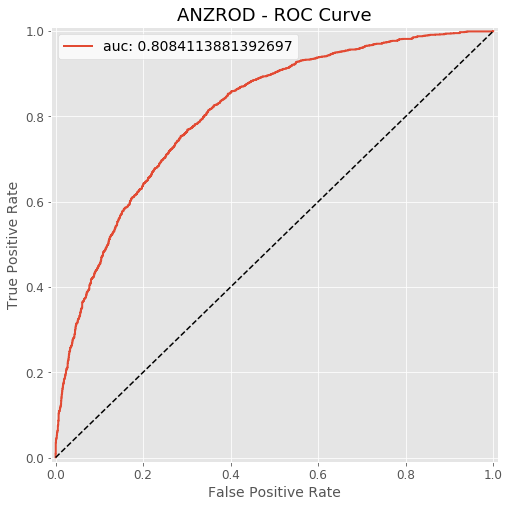

In [238]:
plot_roc_curve(fpr, tpr, auc_anzrod, 'ANZROD')

## Summary
Support vector machine, random forests and gradient boosting classifiers are better than Apache 3 and ANZROD in predictive performance. All of them achieved an above-77% accuracy(threshold = .5) and above 0.85 in Area Under the ROC Curve with the leading predictor being the gradient boosting machine classifier. The Deep learner performed well, but would likely benefit from more training data.

A simple ensemble technique boosts the AUC by .001%, but reduces the accuracy by .001.

## Final Results

In [239]:
pd.DataFrame([[accu_lr, accu_svc, accu_rf, accu_gbm, accu_ensemble, accu_h2o_deep, accu_apache3, accu_anzrod],
              [auc_lr, auc_svc, auc_rf, auc_gbm, auc_ensemble, auc_h2o_deep, auc_apache3, auc_anzrod]],
              index=['Accuracy(>=.5)', 'Area Under (ROC) Curve'],
              columns=['Logistic Regression', 'Support vector machine', 'Random forests', 'Gradient boosting machine', 'Ensemble', 'h2o Deep Learner', 'Apache 3', 'ANZROD'])

,Logistic Regression,Support vector machine,Random forests,Gradient boosting machine,Ensemble,h2o Deep Learner,Apache 3,ANZROD
Accuracy(>=.5),0.753348,0.778620,0.777104,0.788729,0.787718,0.771039,0.718252,0.726248
Area Under (ROC) Curve,0.823382,0.858113,0.855141,0.867997,0.868372,0.849195,0.802485,0.808411


### Concat prediction_proba for each model to test set, save test set

In [240]:
data_test['lr_pred_proba'] = pred_proba_lr[:, 1]
data_test['rf_pred_proba'] = pred_proba_rf[:, 1]
data_test['svc_pred_proba'] = pred_proba_svc[:, 1]
data_test['gbm_pred_proba'] = pred_proba_gbm[:, 1]
data_test['ensemble_pred_proba'] = pred_proba_ensemble[:, 1]
data_test['h2o_deep_pred_proba'] = h2o_deep_pred

In [241]:
data_test.to_csv('../data/test_set_with_predictions.csv'.format(len(data_train)), index=False)

## Class breakdown per model

In [258]:
def plot_class_breakdown_hist(df, var, var_name, plot_title, xlog=False, ylog=False, **histkwargs):
    df[var][df.died_hosp == 0].hist(alpha=.5, label='Survived', color = "green", **histkwargs)
    df[var][df.died_hosp == 1].hist(alpha=.5, label='Died', color = "red", **histkwargs)
    plt.xlabel(var_name)
    plt.title(plot_title)
    if xlog:
        plt.xscale('log')
    if ylog:
        plt.yscale('log')
    plt.ylim(ymax=250, ymin=0)
    plt.legend()
    plt.savefig(var_name + ' Class Breakdown.png');

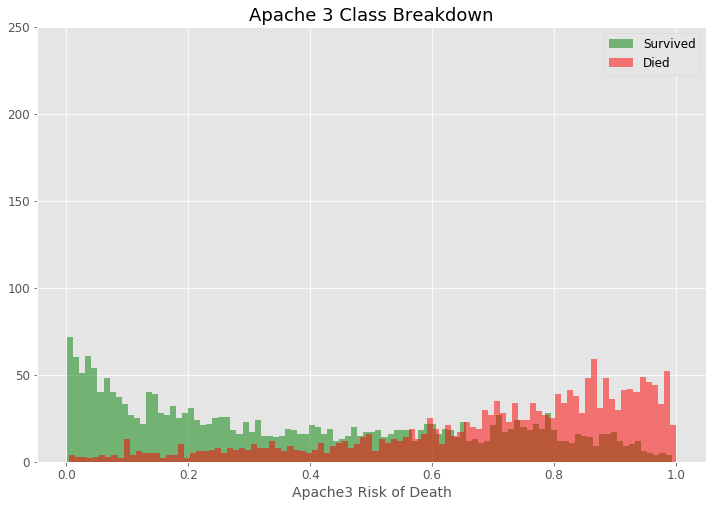

In [259]:
plot_class_breakdown_hist(data_test, 'apache3riskofdeath', var_name='Apache3 Risk of Death', 
                          plot_title='Apache 3 Class Breakdown', bins=100)

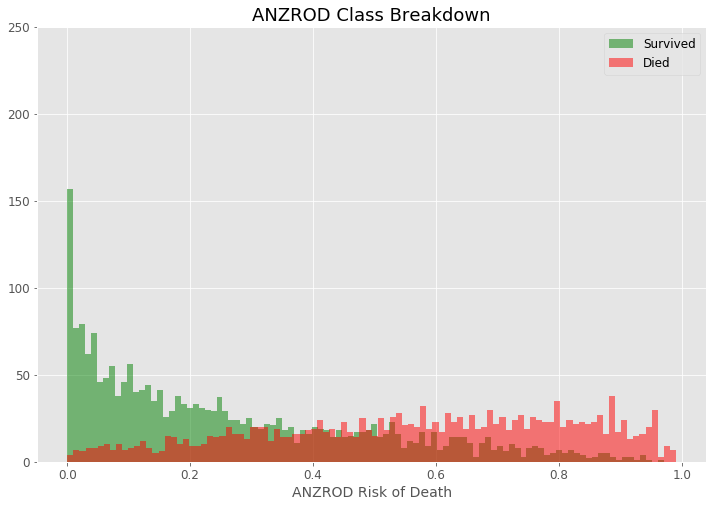

In [260]:
plot_class_breakdown_hist(data_test, 'anzrodriskofdeath', var_name='ANZROD Risk of Death', 
                          plot_title='ANZROD Class Breakdown', bins=100)

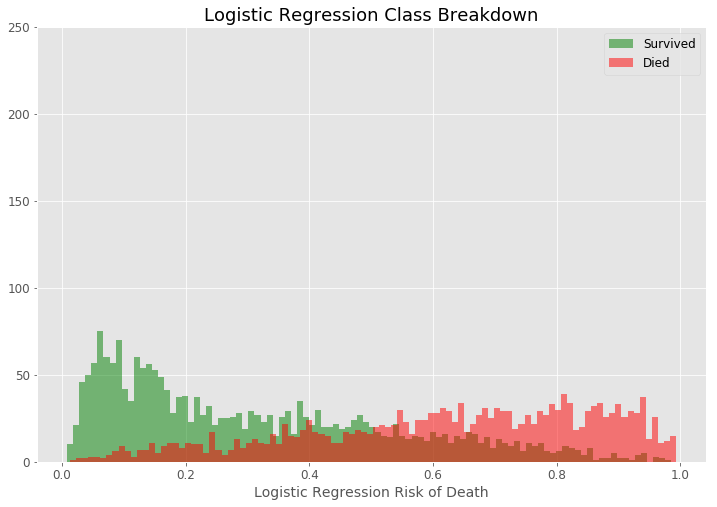

In [261]:
plot_class_breakdown_hist(data_test, 'lr_pred_proba', var_name='Logistic Regression Risk of Death', 
                          plot_title='Logistic Regression Class Breakdown', bins=100)

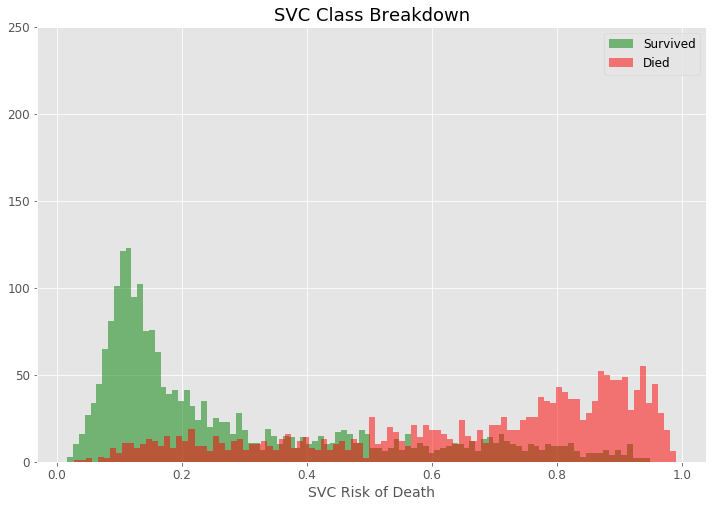

In [262]:
plot_class_breakdown_hist(data_test, 'svc_pred_proba', var_name='SVC Risk of Death', 
                          plot_title='SVC Class Breakdown', bins=100)

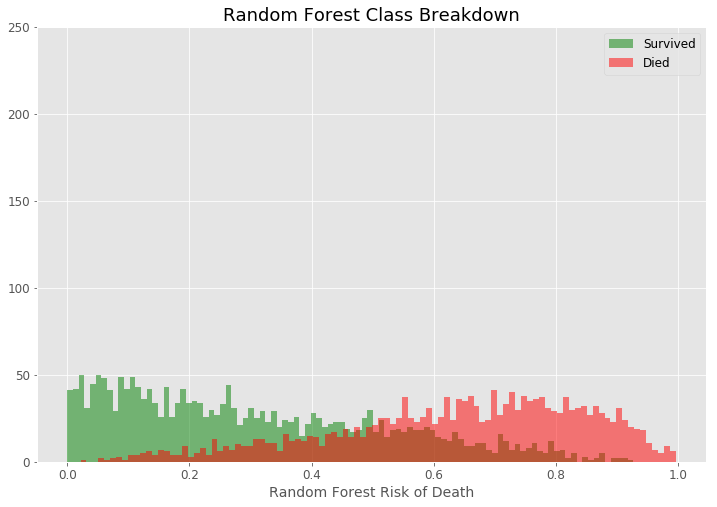

In [263]:
plot_class_breakdown_hist(data_test, 'rf_pred_proba', var_name='Random Forest Risk of Death', 
                          plot_title='Random Forest Class Breakdown', bins=100)

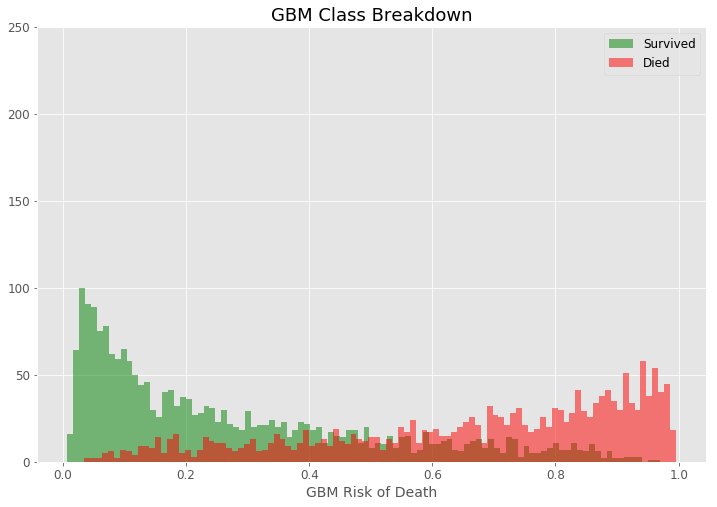

In [264]:
plot_class_breakdown_hist(data_test, 'gbm_pred_proba', var_name='GBM Risk of Death', 
                          plot_title='GBM Class Breakdown', bins=100)

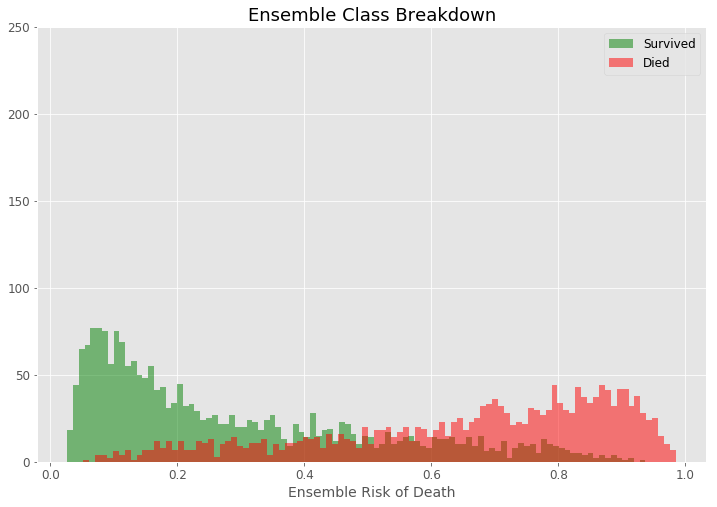

In [265]:
plot_class_breakdown_hist(data_test, 'ensemble_pred_proba', var_name='Ensemble Risk of Death', 
                          plot_title='Ensemble Class Breakdown', bins=100)

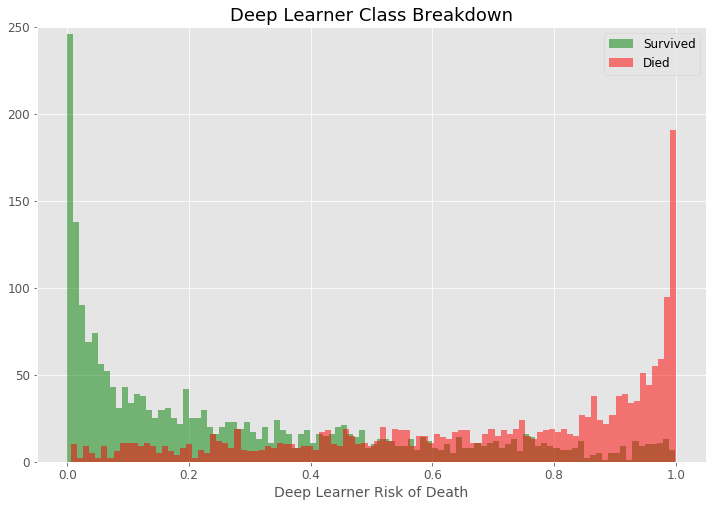

In [266]:
plot_class_breakdown_hist(data_test, 'h2o_deep_pred_proba', var_name='Deep Learner Risk of Death', 
                          plot_title='Deep Learner Class Breakdown', bins=100)

In [267]:
import numpy as np
from sklearn import metrics

model = dict()
actual = dict()
predict = dict()
color = dict()
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3

model[0] = 'Apache 3'
actual[0] = data_test[~data_test.apache3riskofdeath.isna()].died_hosp
predict[0] = data_test[~data_test.apache3riskofdeath.isna()].apache3score
color[0] = 'blue'

model[1] = 'ANZROD'
actual[1] = data_test[~data_test.anzrodriskofdeath.isna()].died_hosp
predict[1] = data_test[~data_test.anzrodriskofdeath.isna()].anzrodriskofdeath
color[1] = 'orange'

model[2] = 'Soft-voter Ensemble'
actual[2] = data_test.died_hosp
predict[2] = data_test.ensemble_pred_proba
color[2] = 'red'

for i in range(n_classes):
    fpr[i], tpr[i], thresholds = metrics.roc_curve(actual[i], predict[i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

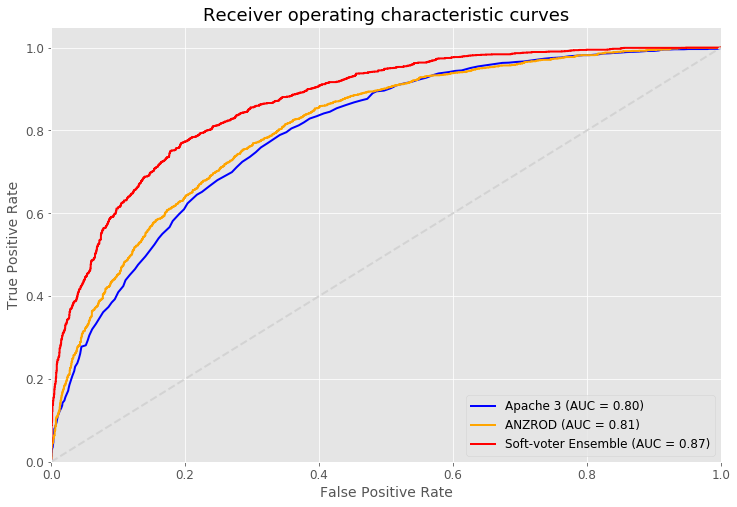

In [268]:
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=color[i],
         lw=lw, label=model[i]+' (AUC = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='lightgrey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.legend(loc="lower right")
plt.show()

In [269]:
# observed mortality vs predicted mortality
# end result: Table with column per model (and true score on the end), rows are age groups
# get list of observed mortality per model (per age group find % mortality)
# then get df of all series together (per model create dict where key = model, vals = mortality)
# Create df from dict

#calculate observed mortality
data_test['died_hosp'].sum() / len(data_test['died_hosp'])

# calculate per age group
age_groups = ['[0, 30)','[30, 40)','[40, 50)','[50, 60)','[60, 70)','[70, 80)','[80,)']
predicted_mortality = []
for group in age_groups:
    predicted_mortality.append(data_test[(data_test.age_group == group) & (~data_test.died_hosp.isna())]['died_hosp'].sum() / len(data_test[(data_test.age_group == group) & (~data_test.died_hosp.isna())]['died_hosp']))
predicted_mortality

# create list per model
models = ['apache3riskofdeath','anzrodriskofdeath','lr_pred_proba','rf_pred_proba','svc_pred_proba',
          'gbm_pred_proba','h2o_deep_pred_proba','ensemble_pred_proba','died_hosp']
predicted_mortality_dict = {}
for model in models:
    mortality_by_age_group = []
    for group in age_groups:
        mortality_by_age_group.append(data_test[(data_test.age_group == group) & (~data_test[model].isna())][model].sum() / len(data_test[(data_test.age_group == group) & (~data_test[model].isna())][model]))
    predicted_mortality_dict[model] = mortality_by_age_group
predicted_mortality_dict

# Create df from dict
observed_mortality_by_agegroup_df = pd.DataFrame.from_dict(predicted_mortality_dict)
# add age_group col
observed_mortality_by_agegroup_df["Age group"] = age_groups
# set age_group col as index
observed_mortality_by_agegroup_df.set_index("Age group", inplace=True)
#re-order columns
observed_mortality_by_agegroup_df = observed_mortality_by_agegroup_df[models]
#Rename columns
observed_mortality_by_agegroup_df.rename(columns={'died_hosp':'True Ratio',
                                                  'apache3riskofdeath':'Apache 3',
                                                  'anzrodriskofdeath':'ANZROD',
                                                 'lr_pred_proba':'Logistic Regression',
                                                 'rf_pred_proba':'Random Forest Classifier',
                                                 'svc_pred_proba':'Support Vector Classifier',
                                                 'gbm_pred_proba':'Gradient Boosted Machine',
                                                  'h2o_deep_pred_proba':'Deep Learner',
                                                 'ensemble_pred_proba':'Ensemble Classifier'},
                                        inplace=True)
# Rename Index
observed_mortality_by_agegroup_df.rename(index={'[0, 30)':'0-29',
                                               '[30, 40)':'30-39',
                                               '[40, 50)':'40-49',
                                               '[50, 60)':'50-59',
                                               '[60, 70)':'60-69',
                                               '[70, 80)':'70-79',
                                               '[80,)':'80+'},
                                        inplace=True)
observed_mortality_by_agegroup_df.round(3)

,Apache 3,ANZROD,Logistic Regression,Random Forest Classifier,Support Vector Classifier,Gradient Boosted Machine,Deep Learner,Ensemble Classifier,True Ratio
Age group,,,,,,,,,
0-29,0.412,0.287,0.366,0.433,0.435,0.420,0.392,0.429,0.394
30-39,0.405,0.293,0.388,0.425,0.394,0.402,0.385,0.407,0.426
40-49,0.463,0.343,0.442,0.443,0.426,0.426,0.427,0.432,0.428
50-59,0.477,0.350,0.436,0.419,0.410,0.398,0.423,0.409,0.396
60-69,0.566,0.439,0.469,0.450,0.450,0.443,0.472,0.448,0.445
70-79,0.589,0.449,0.479,0.486,0.496,0.498,0.512,0.493,0.508
80+,0.594,0.454,0.491,0.502,0.512,0.529,0.543,0.514,0.521


In [270]:
# Save output
observed_mortality_by_agegroup_df.to_csv('Observed and Predicted Mortality by Age Group.csv')
observed_mortality_by_agegroup_df.round(3).to_csv('Observed and Predicted Mortality by Age Group (Rounded).csv')

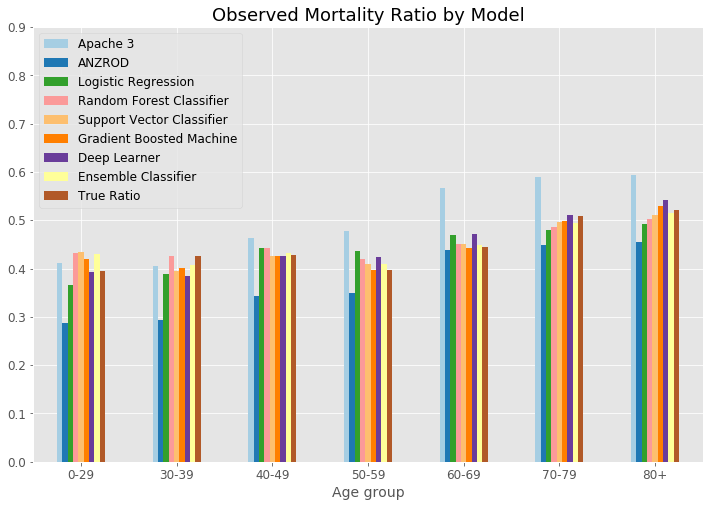

In [271]:
# Create graph
observed_mortality_by_agegroup_df.plot(kind='bar',
                                       ylim=(0,0.9),
                                       rot=0,
                                       title='Observed Mortality Ratio by Model',
                                       colormap='Paired')

## List of all features used

In [272]:
data_train_X.columns.to_frame().to_csv('Final features for model.csv') # Save to CSV
data_train_X.columns.to_frame()

,0
sex,sex
chr_resp,chr_resp
chr_cvs,chr_cvs
chr_liv,chr_liv
chr_ren,chr_ren
immundis,immundis
immunrx,immunrx
hepfail,hepfail
lymphoma,lymphoma
metast,metast
